<a href="https://colab.research.google.com/github/sandhiya0147/Data_Science/blob/main/modelbuilding3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK ASSIGNMENT 3**

"Predict Student Performance Using Machine Learning"

1.Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

2.Load Dataset:

In [3]:
df = pd.read_csv('/content/Student_Performance.csv')

3.Basic Analysis:

In [21]:
df.info()
print("\nData Head:\n", df.head())
print("\nData Tail:\n", df.tail())
print("\nData description:\n",df.describe)
print("\nData shape:\n",df.shape)
print("\nMissing values:\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB

Data Head:
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3           

4.Visual Analysi:

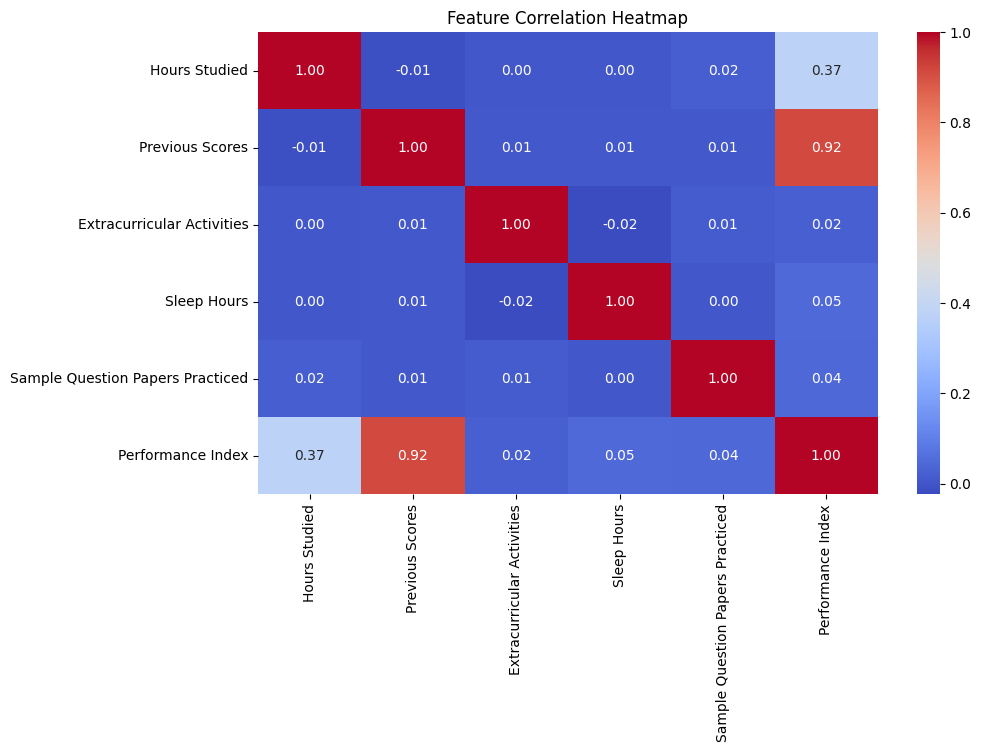

In [18]:
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_df.fillna(numeric_df.median(),inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

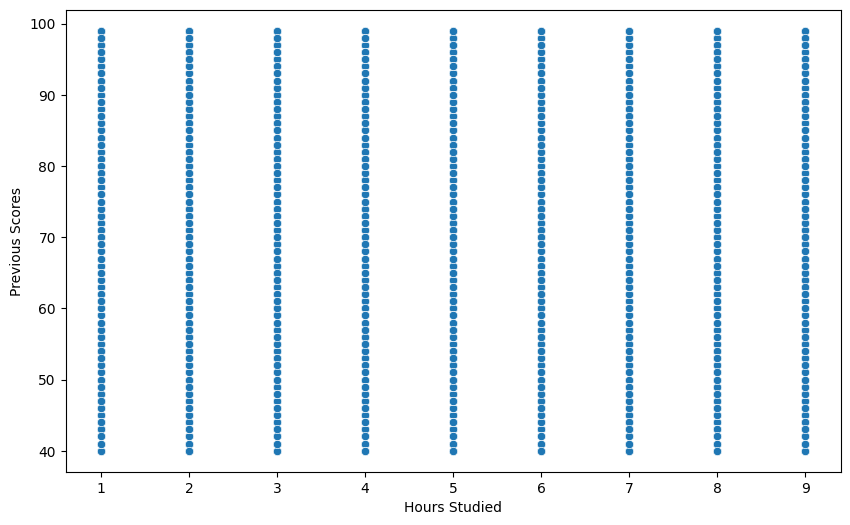

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours Studied', y='Previous Scores', data=df)
plt.show()

5.Encode categorical variables:

In [22]:
df['Extracurricular Activities'] = LabelEncoder().fit_transform(df['Extracurricular Activities'])

6.Model Building:

**Random Forest Regressor:**

In [8]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)

7.Evaluation:

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

RMSE: 2.27
R² Score: 0.986


8.Feature Importance:

In [13]:
importances = model.feature_importances_
feature_names = X.columns

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

        Visual Representation:

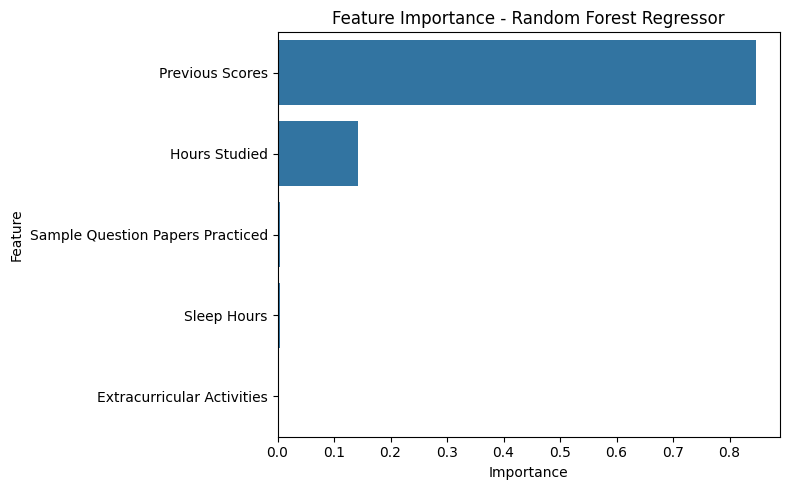

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("Feature Importance - Random Forest Regressor")
plt.tight_layout()
plt.show()